In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
#If you want the Keras modules you write to be compatible with both 
#Theano (th) and TensorFlow (tf), you have to write them via the abstract Keras backend API.
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.models import Model
#Till we have more data, we use ceil() at validation steps
import math

Using TensorFlow backend.


In [2]:
image_path="data"
IMG_SIZE=100

#https://keras.io/preprocessing/image/#imagedatagenerator-class
data_generator=ImageDataGenerator(validation_split=0.2)

train_data = data_generator.flow_from_directory(image_path,target_size=(100,100), color_mode='rgb', batch_size=10, subset='training')
valid_data = data_generator.flow_from_directory(image_path,target_size=(100,100), color_mode='rgb', batch_size=10, subset='validation')

STEP_SIZE = train_data.n//train_data.batch_size
VALIDATION_STEPS = math.ceil(valid_data.n / valid_data.batch_size)

print("Classes : ",train_data.class_indices)
print("VALIDATION_STEPS : ",VALIDATION_STEPS)

Found 22 images belonging to 2 classes.
Found 5 images belonging to 2 classes.
Classes :  {'False_Images': 0, 'Processed_Images': 1}
VALIDATION_STEPS :  1


In [3]:
base_model=ResNet50(include_top=False, weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)

#we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x)
#x=Dropout(0.3)(x)
x=Dense(512,activation='relu')(x)
#x = Dense(256,activation='relu')(x)
#final layer with softmax activation
preds=Dense(2,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=preds)
#model.summary()
print(len(model.layers))

W0912 16:22:06.950827  8932 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0912 16:22:06.985859  8932 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 16:22:06.999871  8932 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0912 16:22:07.030901  8932 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0912 16:22:0

179


In [4]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True
    
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit_generator(generator=train_data,
                   steps_per_epoch=STEP_SIZE,
                   validation_data=valid_data,
                   validation_steps=VALIDATION_STEPS,
                   epochs=15)

print(history.history.keys())

W0912 16:22:17.784919  8932 deprecation_wrapper.py:119] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0912 16:22:17.973091  8932 deprecation.py:323] From C:\Users\sidha\.conda\envs\Keras\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
2/2 [==============================] - 14s 7s/step - loss: 0.7207 - acc: 0.6000 - val_loss: 3.2243 - val_acc: 0.8000
Epoch 2/15
2/2 [==============================] - 1s 471ms/step - loss: 2.1769 - acc: 0.8167 - val_loss: 3.3496 - val_acc: 0.8000
Epoch 3/15
2/2 [==============================] - 0s 96ms/step - loss: 0.2143 - acc: 0.8778 - val_loss: 4.7130 - val_acc: 0.6000
Epoch 4/15
2/2 [==============================] - 0s 104ms/step - loss: 0.7413 - acc: 0.9000 - val_loss: 4.0243 - val_acc: 0.6000
Epoch 5/15
2/2 [==============================] - 0s 93ms/step - loss: 1.3300 - acc: 0.7444 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 6/15
2/2 [==============================] - 0s 96ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 7/15
2/2 [==============================] - 0s 104ms/step - loss: 1.5251 - acc: 0.7500 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 8/15
2/2 [==============================] - 0s 94ms/step - loss: 1.0557 - acc: 0.8778 - v

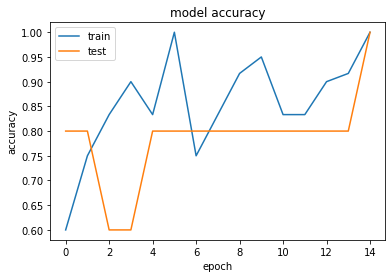

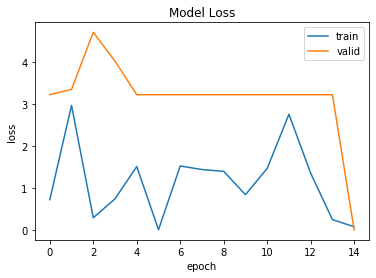

In [6]:
#Plotting graphs for better viewing the model
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation